## Final Project of HUDM5199 Group 2 
---

### Team member name - UNI : Responsibilities

Manrui Zhang - mz2807: Data preprocessing,Descriptive analysis

Xi Gu - xg2346:Data preprocessing,Descriptive analysis

Yixiong Xu - yx2611:Data visualization,Predictive analysis

Jiasheng Yu - jy3084:Statistical analysis,Predictive analysis

----

### Background

Based on one website, one of the most popular ways for Incentiving employees is giving promotions (Heathfield, 2021). So far, many companies have built their own statistical tables to record the incentive information of their employees. This table not only collects the basic information of the employees but also it a good guide for the boss to promote employees. Also, many employees can express their satisfaction level to the companies through the hr and which will become good suggestions for the company to improve itself. For us, we are graduate students will be working for some companies soon, so it's really important for us to know some knowledge about how we can get promotion from one company in advance.

Another main factor of this kind of table is the left factor because this factor can also help the boss to make overall plans such as mobilizing personnel and resources. For us, we should also know some factors that may result in the left of employees. If we can know this, we can help the company correct mistakes and retain talented employees

During the class, we have already processed one dataset called "Employee_Attrition_Dataset_excel" and there were lots of features we think can tell us the potential relationships and interests of the dataset. To be specific, the feature "attrition" is really similar to "left". We think we can use the more clear meaning of features to predict the "left" and "promotion", such as working hours, satisfaction level, and so on.

Thus, we find one dataset that is similar to "Employee_Attrition_Dataset_excel" and want to predict the "promotion_last_5years" and "left" by using predictive analysis. Besides, we do data preprocessing, descriptive analysis, data visualization, and statistical analysis.


### Data preprocessing

**Basic Information**

Source: https://www.kaggle.com/cezarschroeder/human-resource-analytics-dataset

Year: 2019-03-24,Version 1

Number of variables: 11

Observations: 14999
 

**Import the packages/libraries that we need so far to import and pre-process the data**

In [1]:
import numpy as np
import pandas as pd

**Import the dataset hr_data.csv**

In [2]:
hr_df = pd.read_csv("hr_data.csv")

**Using head() method to see the features of the dataset**

In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


**For predicting the promotion_last_5years,because we only need the information of the employees who are still in the company, we will remove the rows which has the feature "left" equals to yes**

In [4]:
hr_df2 = hr_df.reset_index(drop = True)

**Check whether there is null value in the feature 'left'. The answer is :no**

In [212]:
hr_df2.isnull().sum()


satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         151
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                14764
department                   0
salary                       0
dtype: int64

**Find the rows number that has the feature 'left' = 'yes' (3571 rows)**

In [6]:
rows = [i for i in hr_df2.index if hr_df2.iat[i,6]=='yes']

**Remove these rows**

In [7]:
hr_df3 = hr_df2.drop(rows, axis = 0)
#hr_df3 = hr_df2

**Check whether there is still some 'yes' values in the feature left**

In [8]:
hr_df3 = hr_df3.reset_index(drop = True)
hr_df3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.58,0.74,4,215.0,3.0,0,no,0,NaN,sales,low
1,0.82,0.67,2,202.0,3.0,0,no,0,NaN,sales,low
2,0.45,0.69,5,193.0,3.0,0,no,0,NaN,sales,low
3,0.78,0.82,5,247.0,3.0,0,no,0,NaN,sales,low
4,0.49,0.60,3,214.0,2.0,0,no,0,NaN,sales,low


In [9]:
test_row = [j for j in hr_df3.index if hr_df3.iat[j,6]=='yes']
len(test_row)

0

**For predicting promotion_last_5years, we will remove some unimportant features after the discussion: remove "left" and "is_smoker"**

In [10]:
#satisfcation_level
hr_df4 = hr_df3.drop(columns=['left','is_smoker'])
#hr_df4 = hr_df3.drop(columns=['is_smoker'])

In [11]:
hr_df4.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
0,0.58,0.74,4,215.0,3.0,0,0,sales,low
1,0.82,0.67,2,202.0,3.0,0,0,sales,low
2,0.45,0.69,5,193.0,3.0,0,0,sales,low
3,0.78,0.82,5,247.0,3.0,0,0,sales,low
4,0.49,0.60,3,214.0,2.0,0,0,sales,low


In [12]:
hr_df4.isnull().sum()

satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours     310
time_spend_company        73
work_accident              0
promotion_last_5years      0
department                 0
salary                     0
dtype: int64

**Remove the NULL values in the feature "average_montly_hours" and "time_spend_company"**

In [13]:
hr_df4.dropna(inplace = True)

In [14]:
hr_df4.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [68]:
hr_df4 = hr_df4.reset_index(drop = True)

In [69]:
hr_df4_last_evaluation = hr_df4["last_evaluation"]

**Get the mean value of the feature last_evaluation**

In [70]:
hr_df4_last_evaluation.mean()

0.7156553222302621

**Get the median of the feature last_evaluation**

In [71]:
hr_df4_last_evaluation.median()

0.72

**Get the maxumum value of the feature last_evaluation**

In [72]:
hr_df4_last_evaluation.max()

1.0

### Descriptive analysis

In [154]:
hr_df4.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
count,11048.00000,11048.000000,11048.000000,11048.000000,11048.00000,11048.000000,11048.000000
mean,0.66658,0.715655,3.788197,198.988957,3.37319,0.173878,0.026883
std,0.21759,0.162143,0.978930,45.734110,1.55344,0.379021,0.161748
min,0.12000,0.360000,2.000000,96.000000,2.00000,0.000000,0.000000
25%,0.54000,0.580000,3.000000,162.000000,2.00000,0.000000,0.000000
50%,0.69000,0.720000,4.000000,198.000000,3.00000,0.000000,0.000000
75%,0.84000,0.850000,4.000000,238.000000,4.00000,0.000000,0.000000
max,1.00000,1.000000,6.000000,287.000000,10.00000,1.000000,1.000000


In [156]:
columns_to_show = ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident',
                   'promotion_last_5years']
hr_df4.groupby(['department'])[columns_to_show].agg([np.mean, np.std])


last_evaluation           number_project            \
                       mean       std           mean       std   
department                                                       
IT                 0.712768  0.154264       3.751351  0.960706   
RandD              0.705456  0.158732       3.823708  1.006486   
accounting         0.726058  0.159683       3.806569  0.957503   
hr                 0.719506  0.164373       3.699605  0.927404   
management         0.724690  0.153655       3.835271  0.984342   
marketing          0.725309  0.163295       3.709984  0.957781   
product_mng        0.708246  0.170674       3.789474  1.033611   
sales              0.709605  0.162180       3.790782  0.996342   
support            0.722826  0.163374       3.790353  0.945917   
technical          0.717042  0.164292       3.818182  0.981231   

            average_montly_hours            time_spend_company            \
                            mean        std               mean       std   
department                                                                 
IT                    199.045405  45.831048           3.344865  1.485496   
RandD                 199.209726  46.661335           3.253799  1.216712   
accounting            199.029197  45.895787           3.437956  1.548066   
hr                    199.075099  45.307031           3.207510  1.229353   
management            199.755814  44.638162           4.370155  2.569538   
marketing             198.679873  45.073438           3.453249  1.633173   
product_mng           197.320175  47.034719           3.299708  1.464844   
sales                 199.412467  45.599733           3.438992  1.630022   
support               199.152134  46.069272           3.209647  1.377401   
technical             198.545455  45.487768           3.221366  1.302537   

            work_accident           promotion_last_5years            
                     mean       std                  mean       std  
department                                                           
IT               0.162162  0.368799              0.000000  0.000000  
RandD            0.186930  0.390152              0.041033  0.198518  
accounting       0.149635  0.357039              0.025547  0.157925  
hr               0.158103  0.365198              0.029644  0.169772  
management       0.176357  0.381493              0.125969  0.332136  
marketing        0.196513  0.397676              0.068146  0.252196  
product_mng      0.173977  0.379367              0.000000  0.000000  
sales            0.171088  0.376648              0.030172  0.171090  
support          0.188621  0.391328              0.010513  0.102026  
technical        0.170005  0.375734              0.012840  0.112614

We decide to group the dataset by different departments, and mainly focus on its mean and standard deviation which illustrate a general picture of promotion for various departments.

For the last evaluation of departments,accounting has the highest average value, and R&D has the lowest average value. Both of these two departments have relatively small standard deviation, which means they have stable performance in their own sections.

On the other hands, for work accident(another important feature for promotion), marketing has the highest value in both measurements of mean and standard deviation. Although the average number of work accident for marketing is high (due to its nature of work which requires higher flexibility), the accident may not occur regularly.

We also notice that，the employees in departments of IT and product management are difficult to get promotion, which both departments have none promotion in last 5 years.


In [157]:
columns_to_show = ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident',
                   'promotion_last_5years']
hr_df4.groupby(['department', 'salary'])[columns_to_show].agg([np.mean, np.min, np.max])


last_evaluation             number_project            \
                              mean  amin  amax           mean amin amax   
department  salary                                                        
IT          high          0.718333  0.43  0.97       3.884615    2    6   
            low           0.710959  0.37  1.00       3.733813    2    6   
            medium        0.713512  0.38  1.00       3.744186    2    6   
RandD       high          0.705870  0.42  0.95       3.869565    2    6   
            low           0.712039  0.36  1.00       3.792763    2    6   
            medium        0.698896  0.37  1.00       3.847403    2    6   
accounting  high          0.732273  0.38  1.00       3.969697    2    6   
            low           0.728452  0.37  1.00       3.797619    2    6   
            medium        0.721652  0.37  1.00       3.769565    2    6   
hr          high          0.760000  0.54  0.99       3.864865    2    6   
            low           0.725128  0.37  0.99       3.739316    2    6   
            medium        0.707532  0.37  1.00       3.634043    2    6   
management  high          0.714648  0.39  1.00       3.788732    2    6   
            low           0.727328  0.37  1.00       3.818966    2    6   
            medium        0.734492  0.38  1.00       3.898396    2    6   
marketing   high          0.678060  0.38  1.00       3.626866    2    6   
            low           0.738321  0.38  1.00       3.761194    2    6   
            medium        0.724223  0.36  1.00       3.682432    2    6   
product_mng high          0.668033  0.36  0.98       3.704918    2    6   
            low           0.716696  0.37  1.00       3.752976    2    6   
            medium        0.706899  0.36  1.00       3.850174    2    6   
sales       high          0.696498  0.37  0.99       3.814346    2    6   
            low           0.707686  0.36  1.00       3.779661    2    6   
            medium        0.713622  0.36  1.00       3.797468    2    6   
support     high          0.717778  0.41  1.00       3.777778    2    6   
            low           0.721082  0.36  1.00       3.790411    2    6   
            medium        0.725335  0.36  1.00       3.792378    2    6   
technical   high          0.714464  0.36  1.00       3.738095    2    6   
            low           0.719493  0.37  1.00       3.827122    2    6   
            medium        0.714662  0.36  1.00       3.824108    2    6   

                   average_montly_hours               time_spend_company       \
                                   mean   amin   amax               mean amin   
department  salary                                                              
IT          high             193.320513  102.0  275.0           3.038462  2.0   
            low              198.069544   96.0  287.0           3.247002  2.0   
            medium           201.030233   96.0  285.0           3.495349  2.0   
RandD       high             204.217391  107.0  287.0           3.586957  2.0   
            low              197.542763   98.0  287.0           3.276316  2.0   
            medium           200.107143   99.0  284.0           3.181818  2.0   
accounting  high             207.787879   97.0  277.0           3.227273  2.0   
            low              199.107143   99.0  285.0           3.329365  2.0   
            medium           196.430435  102.0  283.0           3.617391  2.0   
hr          high             205.108108  133.0  280.0           2.837838  2.0   
            low              202.188034   98.0  285.0           3.072650  2.0   
            medium           195.025532   98.0  280.0           3.400000  2.0   
management  high             199.258216  106.0  286.0           5.173709  2.0   
            low              201.577586   97.0  286.0           3.284483  2.0   
            medium           199.192513  102.0  279.0           4.128342  2.0   
marketing   high             190.074627  113.0  286.0           3.567164  2.0   
    

Based on the analysis of previous table, we add the salary as additional object to groupby. There are three levels of salary, and the higher level of salary may indicate a higher position that employee has in the company. Then, employee with higher position may be more difficult to get promotions. So we add salary in the consideration

**Summary Table**

In [158]:
pd.crosstab(index = hr_df4['salary'], columns = hr_df4['department'])

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,78,46,66,37,213,67,61,237,126,168
low,417,304,252,234,116,268,336,1357,730,966
medium,430,308,230,235,187,296,287,1422,761,813


In [159]:
pd.crosstab(index = hr_df4['salary'], columns = hr_df4['department'], normalize = True)

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,0.007060,0.004164,0.005974,0.003349,0.019280,0.006064,0.005521,0.021452,0.011405,0.015206
low,0.037744,0.027516,0.022810,0.021180,0.010500,0.024258,0.030413,0.122828,0.066075,0.087437
medium,0.038921,0.027878,0.020818,0.021271,0.016926,0.026792,0.025978,0.128711,0.068881,0.073588


**Pivot Table**

In [160]:
hr_df4.pivot_table(values = ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years'],
               index = ['department','salary'],
               aggfunc = 'mean')

average_montly_hours  last_evaluation  number_project  \
department  salary                                                          
IT          high              193.320513         0.718333        3.884615   
            low               198.069544         0.710959        3.733813   
            medium            201.030233         0.713512        3.744186   
RandD       high              204.217391         0.705870        3.869565   
            low               197.542763         0.712039        3.792763   
            medium            200.107143         0.698896        3.847403   
accounting  high              207.787879         0.732273        3.969697   
            low               199.107143         0.728452        3.797619   
            medium            196.430435         0.721652        3.769565   
hr          high              205.108108         0.760000        3.864865   
            low               202.188034         0.725128        3.739316   
            medium            195.025532         0.707532        3.634043   
management  high              199.258216         0.714648        3.788732   
            low               201.577586         0.727328        3.818966   
            medium            199.192513         0.734492        3.898396   
marketing   high              190.074627         0.678060        3.626866   
            low               203.283582         0.738321        3.761194   
            medium            196.459459         0.724223        3.682432   
product_mng high              194.081967         0.668033        3.704918   
            low               197.151786         0.716696        3.752976   
            medium            198.205575         0.706899        3.850174   
sales       high              199.371308         0.696498        3.814346   
            low               198.176861         0.707686        3.779661   
            medium            200.598453         0.713622        3.797468   
support     high              205.825397         0.717778        3.777778   
            low               196.409589         0.721082        3.790411   
            medium            200.678055         0.725335        3.792378   
technical   high              202.172619         0.714464        3.738095   
            low               198.747412         0.719493        3.827122   
            medium            197.555966         0.714662        3.824108   

                    promotion_last_5years  time_spend_company  work_accident  
department  salary                                                            
IT          high                 0.000000            3.038462       0.051282  
            low                  0.000000            3.247002       0.189448  
            medium               0.000000            3.495349       0.155814  
RandD       high                 0.021739            3.586957       0.195652  
            low                  0.009868            3.276316       0.213816  
            medium               0.074675            3.181818       0.159091  
accounting  high                 0.090909            3.227273       0.196970  
            low                  0.007937            3.329365       0.146825  
            medium               0.026087            3.617391       0.139130  
hr          high                 0.054054            2.837838       0.108108  
            low                  0.008547            3.072650       0.175214  
            medium               0.046809            3.400000       0.148936  
management  high                 0.211268            5.173709       0.159624  
            low                  0.034483            3.284483       0.206897  
            medium               0.085561            4.128342       0.176471  
marketing   high                 0.074627            3.567164       0.194030  
            low                  0.041045            3.313433       0.208955  
            medium               0.091216            3

From the table we could see that employee with high level salary in the department of accounting have longest working 
hour and relative high evaluation. Also, when we look at the average evaluation
of work, employee in hr department (with high level salary)own the highest score, and they work for relative longer
time as well. Therefore, it's safe to say that average monthly hours and evaluation of work have a positive 
relationship.


### Data visualization

In [75]:
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

**Show the proportion of 'promotion_last_5years' amoung different departments.**

<AxesSubplot:ylabel='promotion_last_5years'>

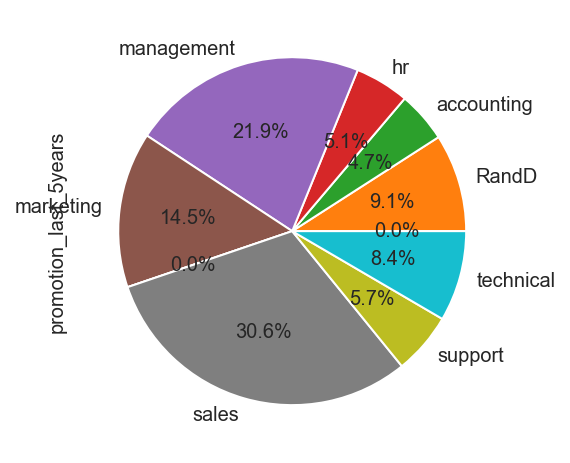

In [207]:
hr_df4.groupby('department').promotion_last_5years.sum().plot(kind = 'pie',autopct= '%1.1f%%')

**Using box plot with jitter to show the distribution and number of the values of last_evaluation.**

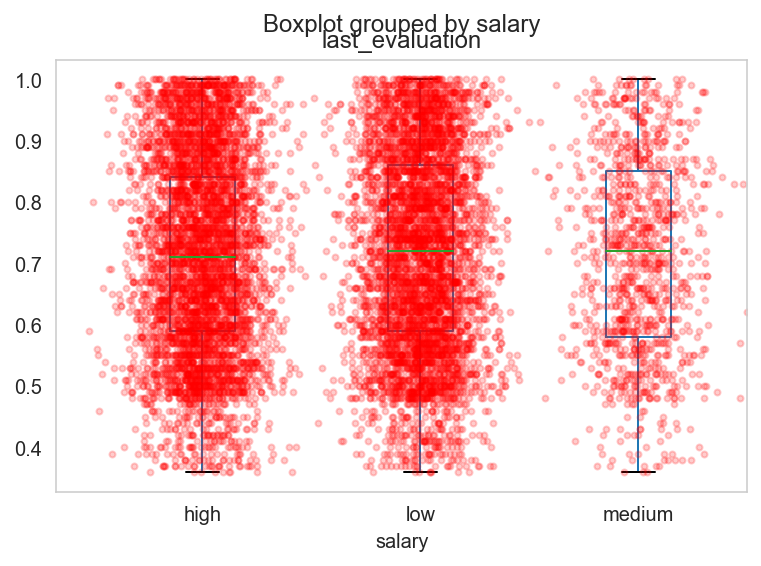

In [77]:
import matplotlib.pyplot as plt
hr_df4.boxplot(column = 'last_evaluation', by = 'salary', grid = False)
j = 1
for i in ['low','medium','high']:
    y = hr_df4.last_evaluation[hr_df4.salary == i].dropna()
    x = np.random.normal(j,0.15, size = len(y))
    plt.plot(x,y,'r.',alpha = 0.2)
    j+=1

From the graph, we can see the employees of high and low salary level are more than the number of employees who have medium salary level. All the values are covering from 0.5 to 1. We may assume that the employees who are in the medium salary level are more steady. The employees who are in the level of low salary want to work hard to upgrade level, and the employees who are in the level of high salary still work very hard. Because the last_evaluation can be used to indicate the level of their working.

**Heat Map**

In [78]:
hr_df4_statistics = hr_df3[['last_evaluation','number_project','average_montly_hours','time_spend_company',
                            'work_accident','promotion_last_5years']]
hr_df4_statistics.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
0,0.74,4,215.0,3.0,0,0
1,0.67,2,202.0,3.0,0,0
2,0.69,5,193.0,3.0,0,0
3,0.82,5,247.0,3.0,0,0
4,0.60,3,214.0,2.0,0,0


<AxesSubplot:>

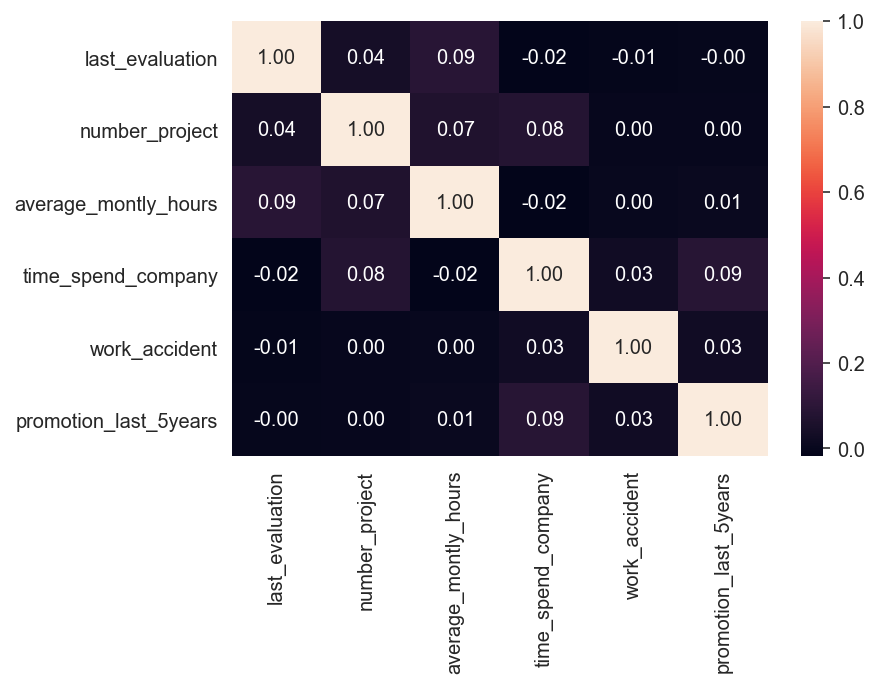

In [79]:
sns.heatmap(hr_df4_statistics.corr(),annot = True,fmt=".2f")

From the graph, we can see that our initial idea about the two important features last_evaluation and work_accident even have less influence on promotion_last_5years. Instead, time_spend_company has more influence.

**Bar plot**

<AxesSubplot:ylabel='salary,department'>

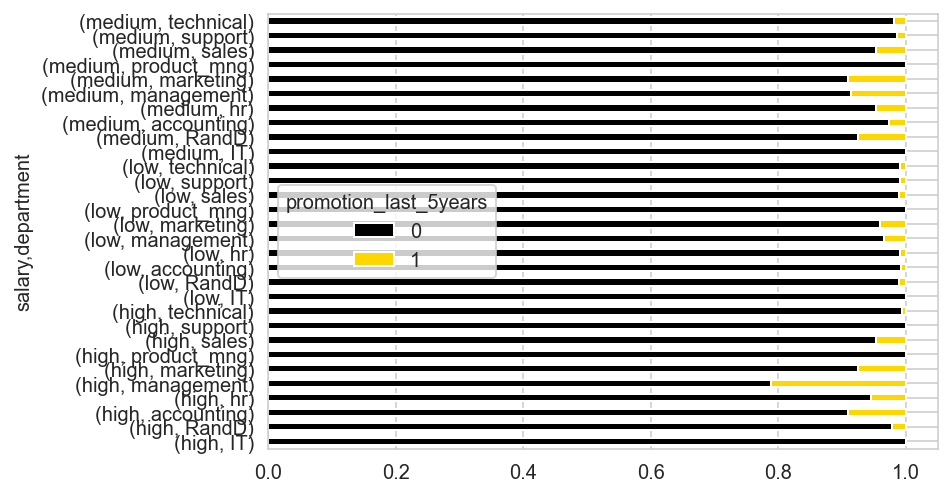

In [80]:
hr_df4_promotion_salary_department = pd.crosstab(index = [hr_df4.salary,hr_df4.department],
                                                 columns = hr_df4.promotion_last_5years)

hr_df4_promotion_salary_department.div(hr_df4_promotion_salary_department.sum(1),
                                       axis = 0).plot(kind = 'barh',stacked = True, 
                                                      color = ['black','gold'])

From the bar plot we can know the different proportions of promotion that amoung different combinations of salary and department

**Line plot**

In [167]:
hr_df4_line = hr_df4[['number_project','average_montly_hours','time_spend_company','department']]
hr_df4_line.head()

,number_project,average_montly_hours,time_spend_company,department
0,4,215.0,3.0,sales
1,2,202.0,3.0,sales
2,5,193.0,3.0,sales
3,5,247.0,3.0,sales
4,3,214.0,2.0,sales


In [194]:
hr_df4_line_avg= pd.DataFrame(hr_df4_line.groupby(['department']).mean())
hr_df4_line_avg

,number_project,average_montly_hours,time_spend_company
department,,,
IT,3.751351,199.045405,3.344865
RandD,3.823708,199.209726,3.253799
accounting,3.806569,199.029197,3.437956
hr,3.699605,199.075099,3.207510
management,3.835271,199.755814,4.370155
marketing,3.709984,198.679873,3.453249
product_mng,3.789474,197.320175,3.299708
sales,3.790782,199.412467,3.438992
support,3.790353,199.152134,3.209647


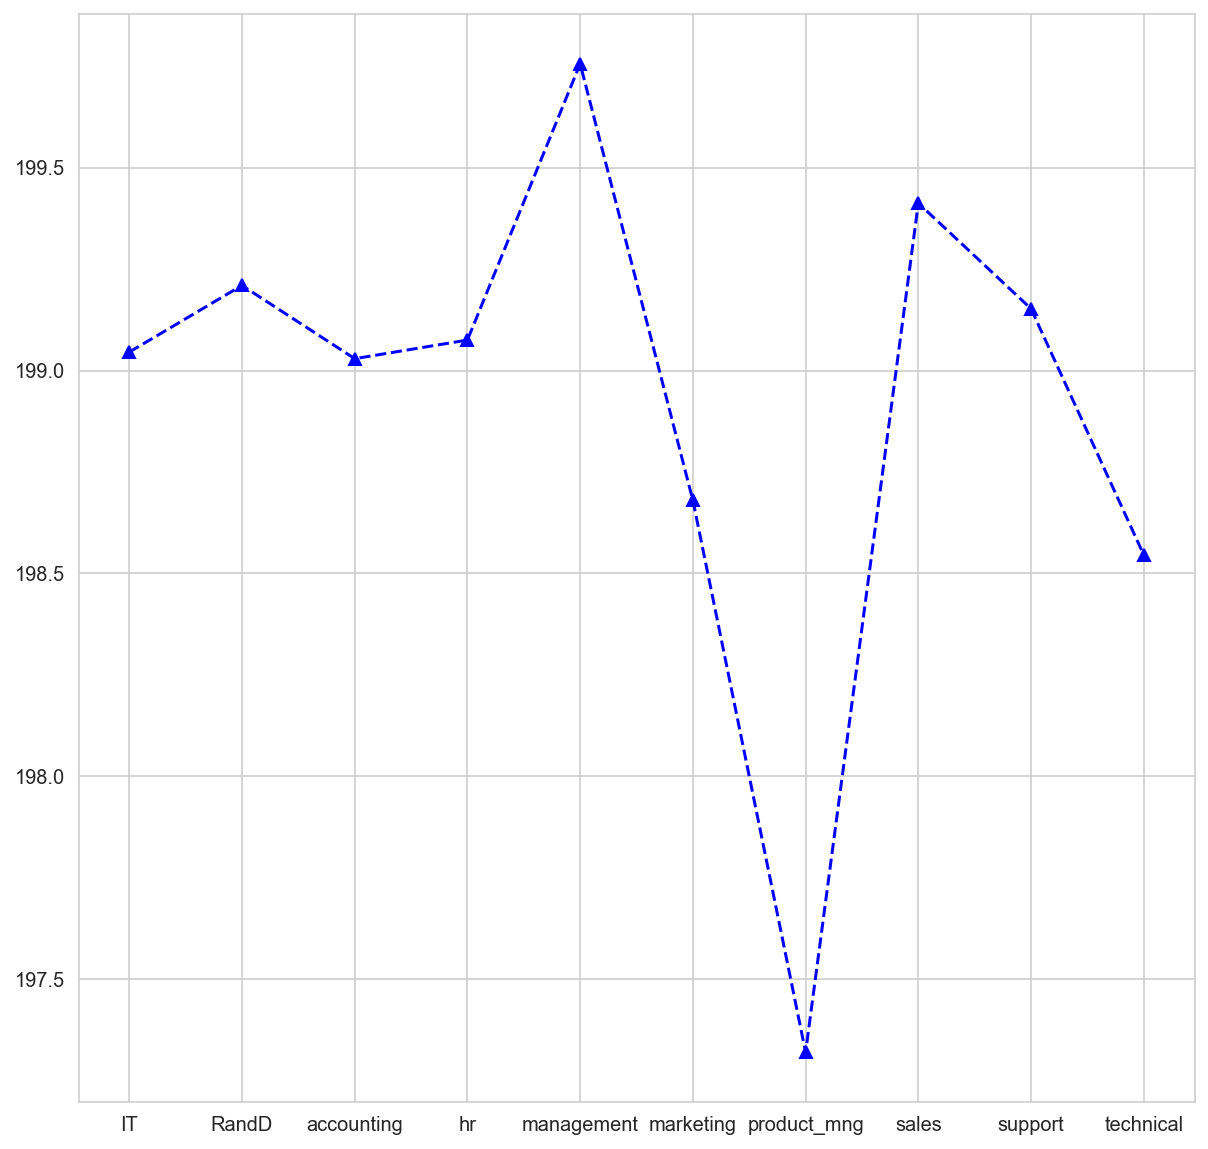

In [199]:
plt.figure(figsize=(10,10))
plt.plot(hr_df4_line_avg['average_montly_hours'],color = 'blue',marker = '^',ls = '--')

We can see from the graph, the department management has the highest average_month_hours which means this department's employee may work harder than other departments. At the same time, the product_mng has the lowest average_month_hours which means this department's employees may work not that hard.

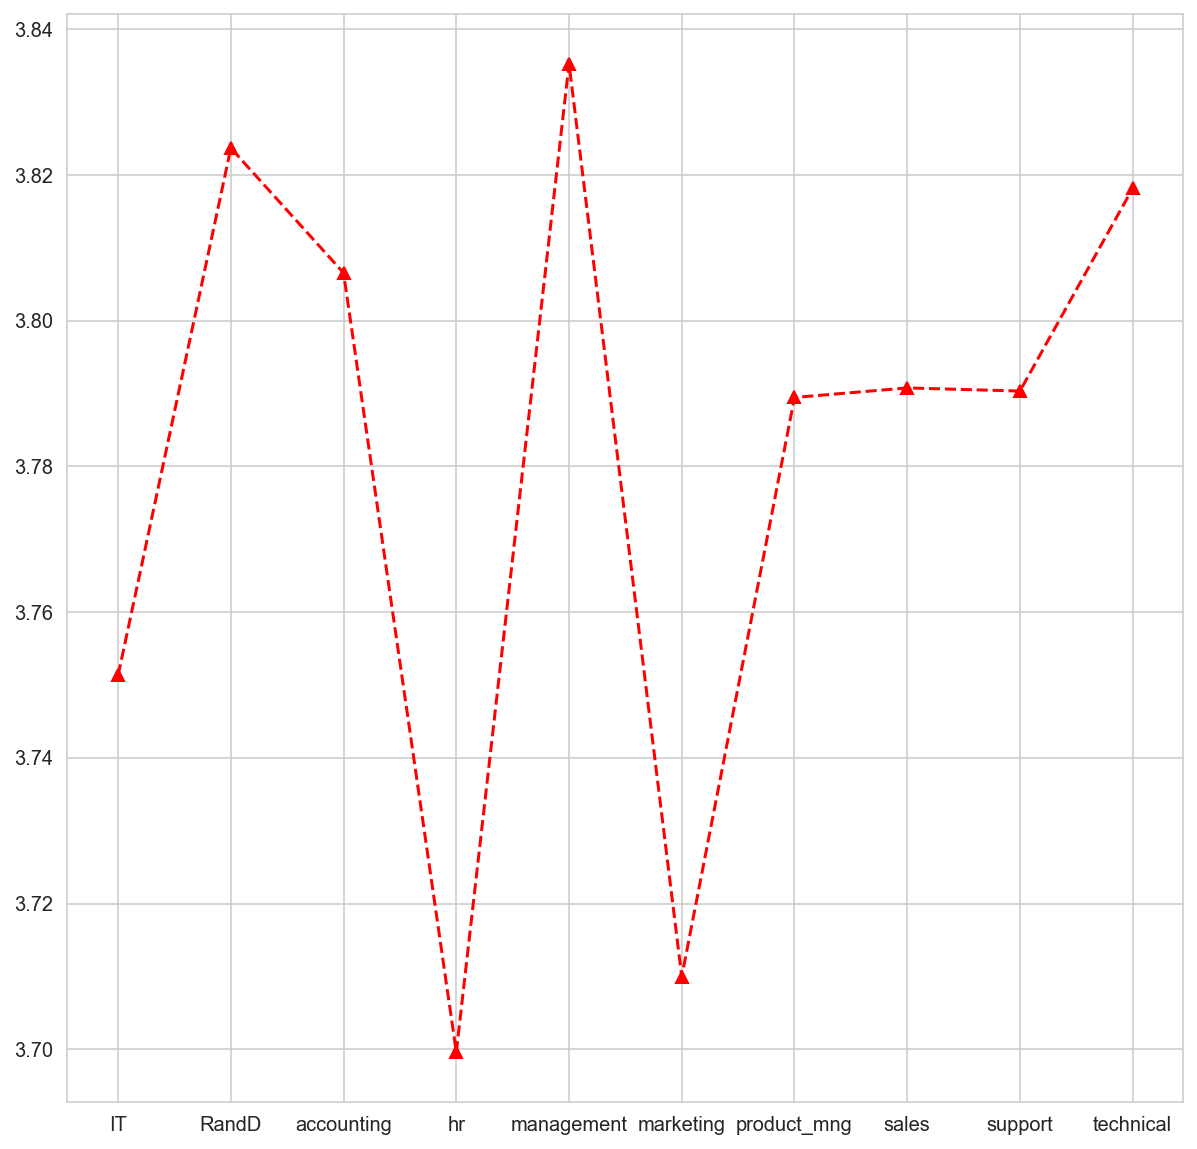

In [204]:
plt.figure(figsize=(10,10))
plt.plot(hr_df4_line_avg['number_project'],color = 'red',marker = '^',ls = '--')

From this graph, we can see there is a huge fluctuation. Although the values don't have big differences, we can see different departments are responsible for different daily tasks which will lead to this kind of graph. Hr did the minimum projects and management did the maximum projects. Product_mng, sales and support have closer relationships so they finish similar numbers of projects.

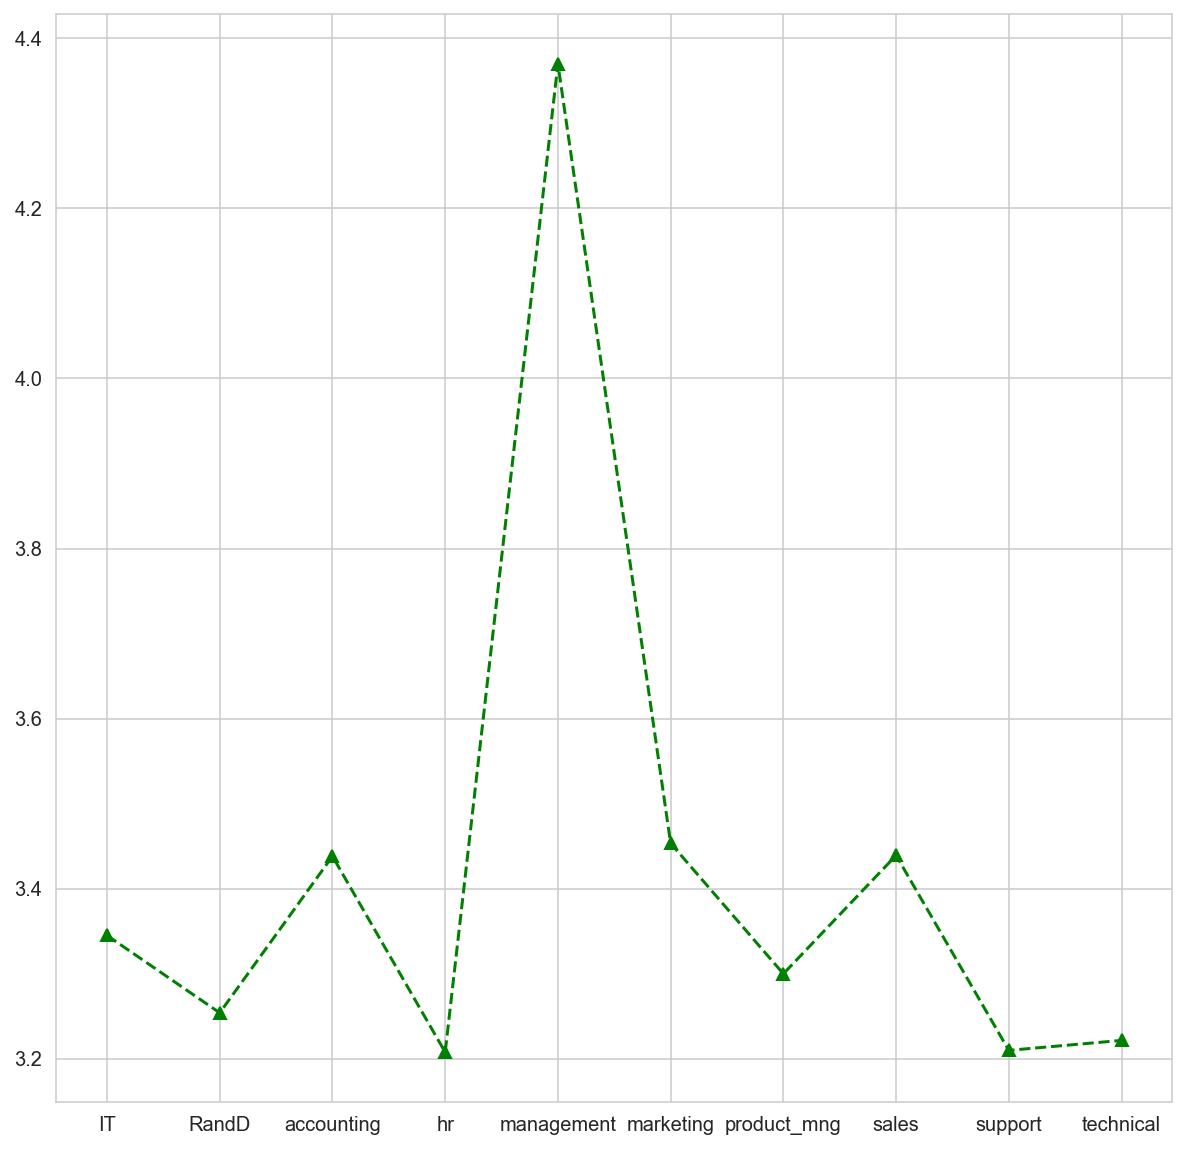

In [205]:
plt.figure(figsize=(10,10))
plt.plot(hr_df4_line_avg['time_spend_company'],color = 'green',marker = '^',ls = '--')

In this graph, we can see the department of management still has the bigest value of it and other department have similar average time_spend_company. It means that this the team of the management in this company is the best team and they devote themselves most.From the pie chart, this team is also the second team which get the most promotion.

### Statistical analysis

In [81]:
import scipy.stats as stats

In [82]:
hr_df4.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
0,0.58,0.74,4,215.0,3.0,0,0,sales,low
1,0.82,0.67,2,202.0,3.0,0,0,sales,low
2,0.45,0.69,5,193.0,3.0,0,0,sales,low
3,0.78,0.82,5,247.0,3.0,0,0,sales,low
4,0.49,0.60,3,214.0,2.0,0,0,sales,low


In [83]:
hr_df4.mean()

satisfaction_level         0.666580
last_evaluation            0.715655
number_project             3.788197
average_montly_hours     198.988957
time_spend_company         3.373190
work_accident              0.173878
promotion_last_5years      0.026883
dtype: float64

**One-sample T-Test**

**We will choose the two important feathres last_evaluation and work_accident**

For last_evaluation

H0:the mean of the last_evaluation is likely to be 0.7

In [84]:
stats.ttest_1samp(hr_df4['last_evaluation'],0.7)

Ttest_1sampResult(statistic=10.148617558639515, pvalue=4.2862371618229934e-24)

From the result above, p is approximate to (4 * 10 ^ -24) which is smaller than 0.05. So, we reject the null hypothesis.
Conclusion: the mean of the feature last_evaluation in our sample is different from 0.7 significantly

For work_accident:

H0: the mean of the promotion is likely to be 0.1

In [85]:
stats.ttest_1samp(hr_df4['work_accident'],0.1)

Ttest_1sampResult(statistic=20.487598743742915, pvalue=1.3825902468845814e-91)

From the result above, the p-value is smaller than 0.05, so we reject the null hypothesis. Conclusion: the mean of the feature promotion_last_5years in our sample is different from 0.1 significantly. 

From the above statistics, we know that although we can have a very close hypothesis like 0.7 is really close to 0.715655, the ttest_1samp method is too accurate, and the hypothesis will be rejected.

**Two-sample T test: testing for difference across two groups**

In [86]:
hr_df4_promotion = hr_df4.groupby("promotion_last_5years").mean()
hr_df4_promotion

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident
promotion_last_5years,,,,,,
0,0.666540,0.715730,3.787741,198.914334,3.349642,0.171984
1,0.668047,0.712963,3.804714,201.690236,4.225589,0.242424


2-sample t-test: testing for difference across populations

test if this is significant

In [87]:
promoted_accident = hr_df4[hr_df4['promotion_last_5years']==1]['work_accident']
nonpromoted_accident= hr_df4[hr_df4['promotion_last_5years']==0]['work_accident']
stats.ttest_ind(promoted_accident,nonpromoted_accident)

Ttest_indResult(statistic=3.1607824842168175, pvalue=0.0015777096486543954)

From the result above, we know that the p-value is approximate 0.0016 < 0.05, so we reject the null hypothesis, conclude that the mean of work_accident in our promoted sample is different from the mean of work_accident in our nonpromoted sample significantly. Thus, there will be some other features that may affect the result of promotion or not.

**Normal Distribution Analysis: test if the data is normal distributed**

In [88]:
test_last_evaluation = hr_df4['last_evaluation']
print(stats.skew(test_last_evaluation))  # skewness for normal distribution is -0.039927296740939415
print(stats.kurtosis(test_last_evaluation)) # kurtosis for normal distribution is -1.0170233860650304

-0.039927296740939415
-1.0170233860650304


Test the Null hypothesis that 'last_evaluation' have a Skew and Kurtosis of a normal distribution

Test if skew and kurtosis of our sample differ significantly from those of a normal distribution


In [89]:
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(test_last_evaluation))

normal skewtest teststat = -1.714 pvalue = 0.0866


p-value is 0.0866 >0.05

Conclude: the skew of our sample last_evaluation is not different from that of a normal distribution

In [90]:
print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(test_last_evaluation))

normal kurtosistest teststat = -52.613 pvalue = 0.0000


p-value is 0.0000 <0.05

Conclude: the skew of our sample last_evaluation is significantly different from that of a normal distribution

In [91]:
print('normaltest teststat = %.3f pvalue = %.4f' % stats.normaltest(test_last_evaluation))

normaltest teststat = 2771.091 pvalue = 0.0000


p<0.05

Conclude: the distribution of our sample last_evaluation is significantly different from a normal distribution

### Predictive analysis

**Multiple Linear Regression**

In [92]:
len(hr_df4)

11048

**Randomly select 10% of the 11048 samples for graphing**

In [93]:
sample_hr_df = hr_df4.drop(columns=['promotion_last_5years'])
sample_hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,department,salary
0,0.58,0.74,4,215.0,3.0,0,sales,low
1,0.82,0.67,2,202.0,3.0,0,sales,low
2,0.45,0.69,5,193.0,3.0,0,sales,low
3,0.78,0.82,5,247.0,3.0,0,sales,low
4,0.49,0.60,3,214.0,2.0,0,sales,low


In [94]:
features = sample_hr_df.columns
features

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'department', 'salary'],
      dtype='object')

In [95]:
sample_hr_df2 = hr_df4.sample(frac=0.1, random_state=7)

In [96]:
sns.set_style('whitegrid')     

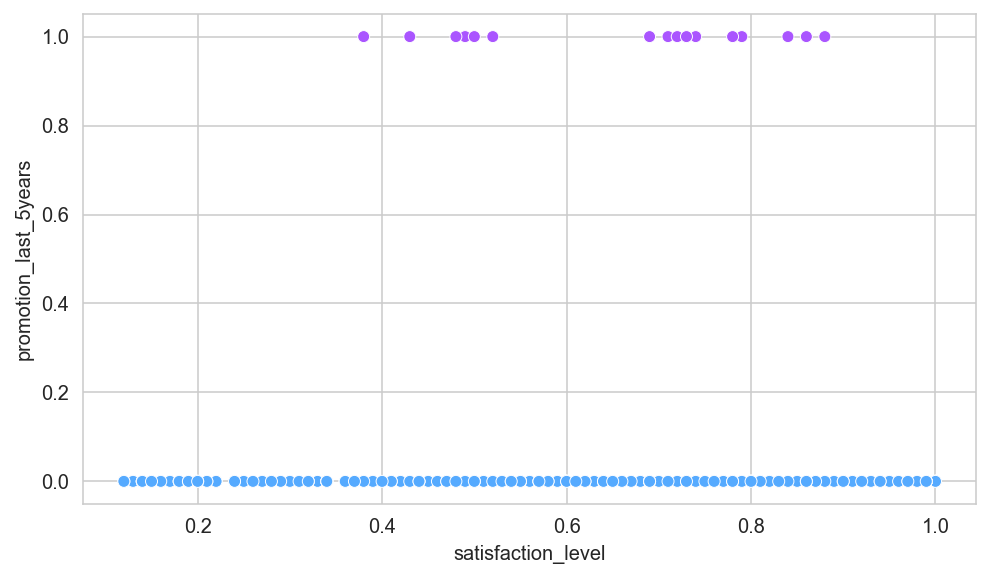

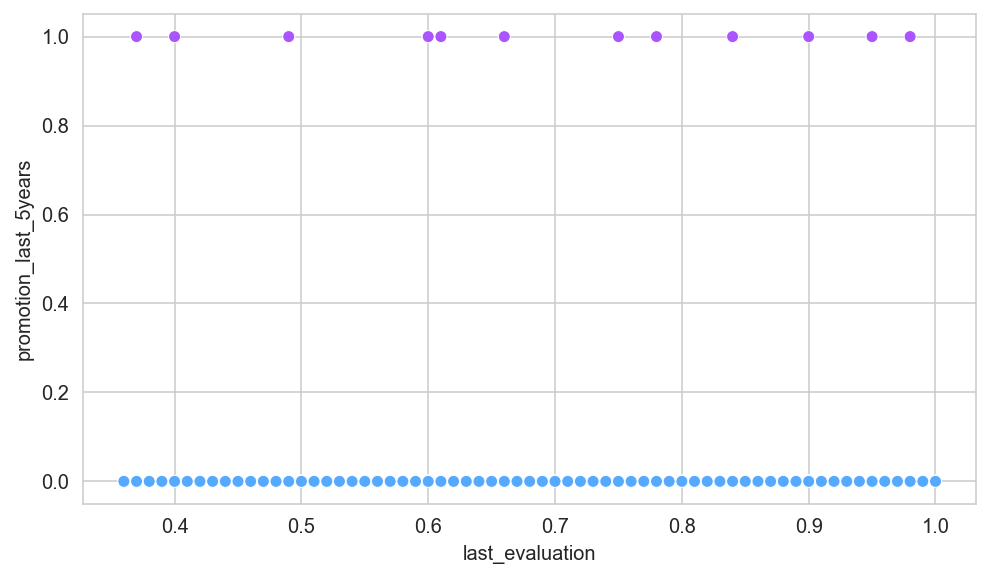

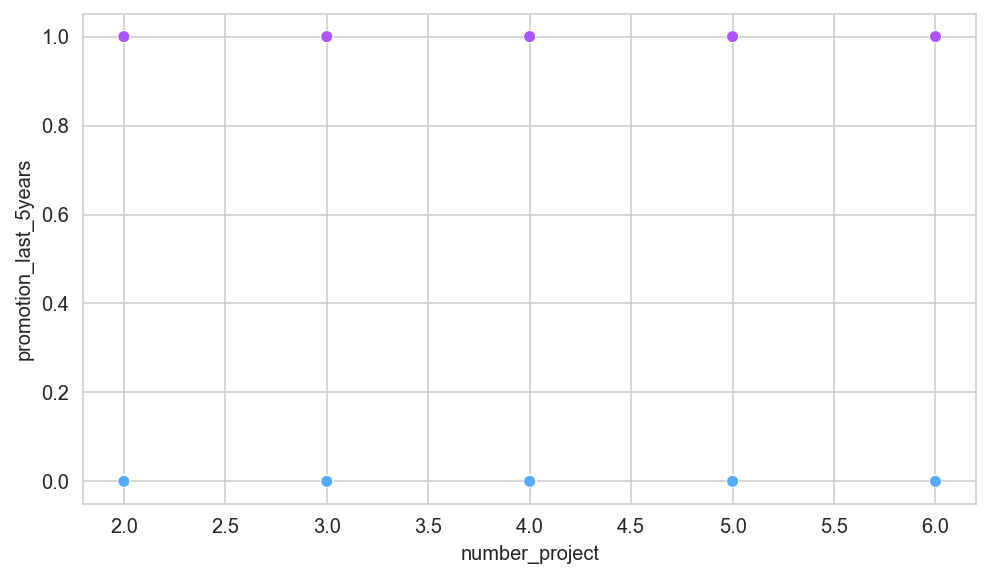

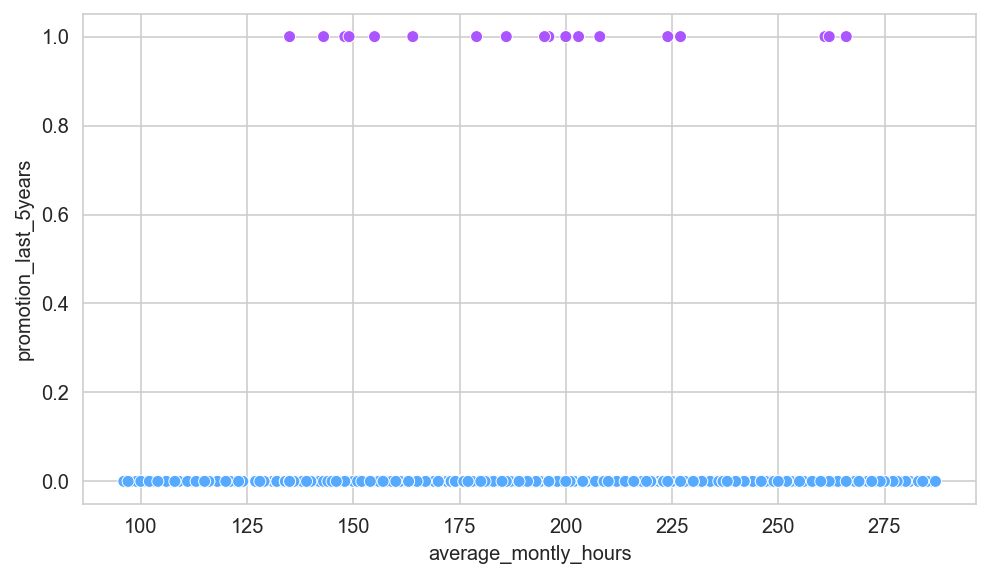

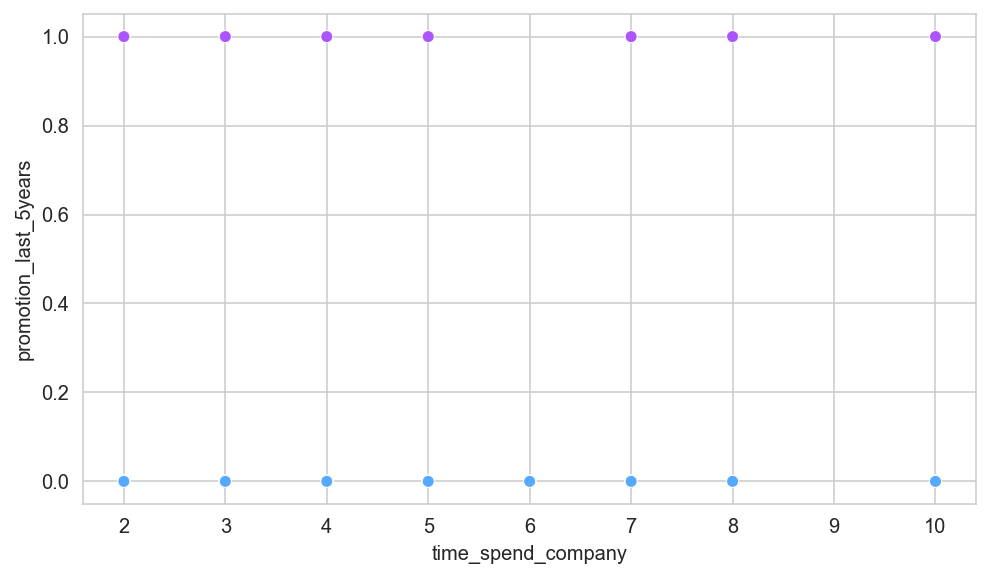

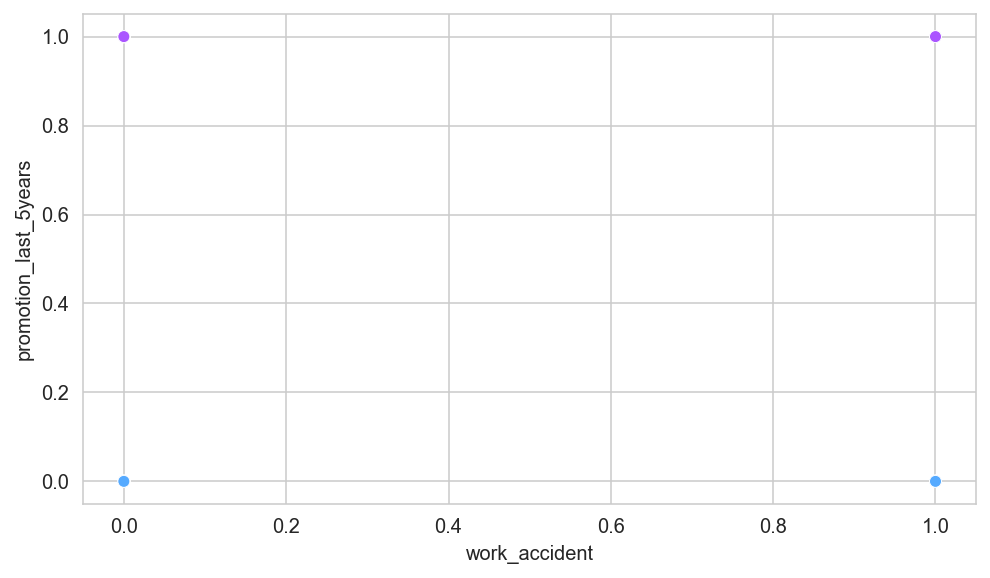

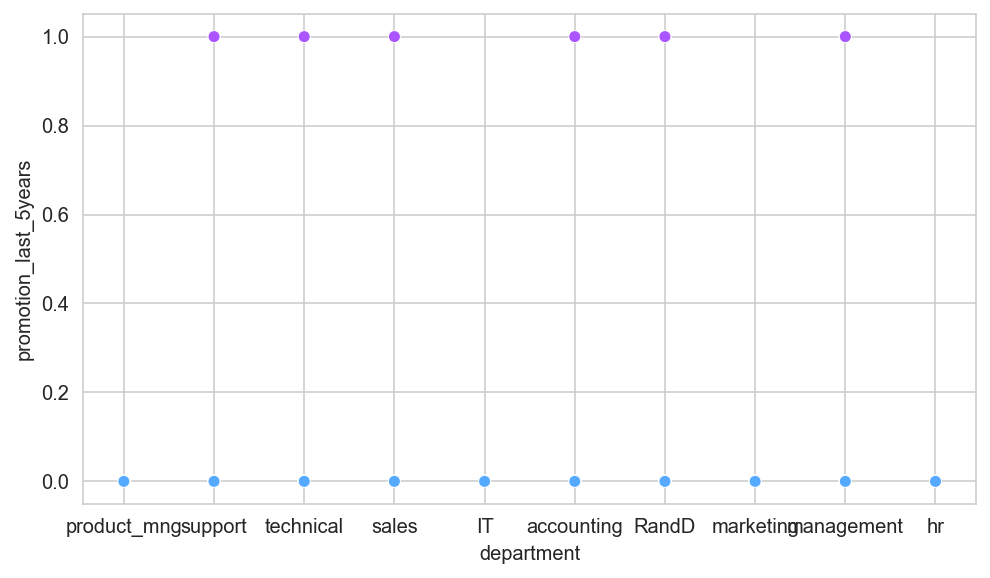

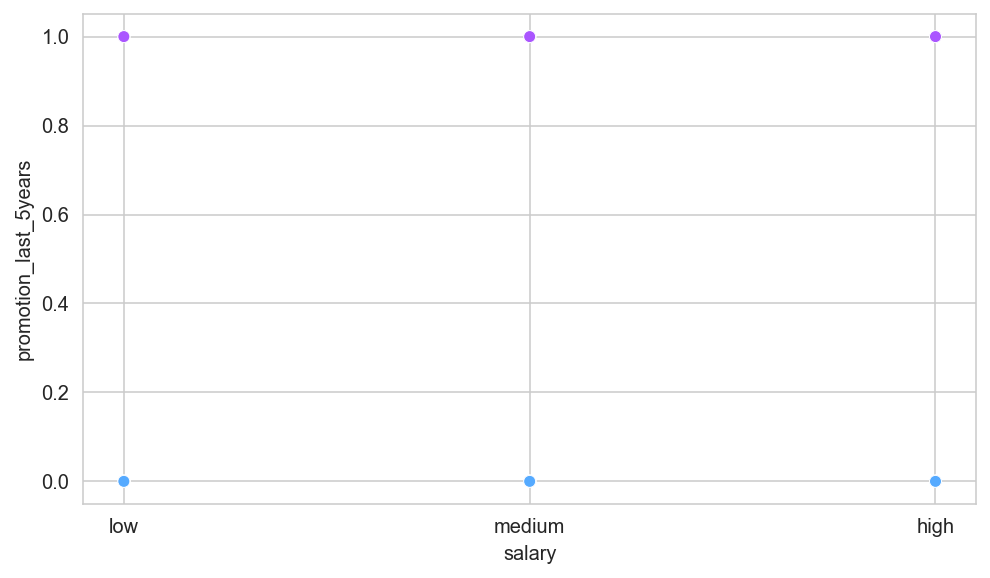

In [97]:
for feature in features:
    plt.figure(figsize=(8, 4.5))
    sns.scatterplot(data=sample_hr_df2, x=feature, 
                    y='promotion_last_5years', hue='promotion_last_5years', 
                    palette='cool', legend=False)

From the scatter plot above, we get the relationships between other features and promotion_last_5years. We can know that the two important features **last_evaluation** and **work_accident** cannot give a clearly tendency of whether the employee can be promoted or not. Moreover, in many factors, the points shows like even distribution. Thus, we get the result that we need to combine more factors together to do that and this is the reason why we need to do multiple linear  regression.

**Splitting the Data for Training and Testing Using train_test_split**

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
hr_df4.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

**Transform some features to factor variables because categorical data must be preprocessed into numerical data or excluded**

In [100]:
hr_df4_predictive = hr_df4.copy()
#left_factors = {'no':0,'yes':1}
salary_factors = {'low':0,'medium':1,'high':2}
department_factors = {'sales':1, 'accounting':2, 'hr':3, 'technical':4, 'support':5, 'management':6,
       'IT':7, 'product_mng':8, 'RandD':9, 'marketing':10}
hr_df4_predictive.loc[:,'salary'] = hr_df4.loc[:,'salary'].map(salary_factors)
hr_df4_predictive.loc[:,'department'] = hr_df4.loc[:,'department'].map(department_factors)
#hr_df4_predictive.loc[:,'left'] = hr_df4.loc[:,'left'].map(left_factors)
hr_df4_predictive.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary
0,0.58,0.74,4,215.0,3.0,0,0,1,0
1,0.82,0.67,2,202.0,3.0,0,0,1,0
2,0.45,0.69,5,193.0,3.0,0,0,1,0
3,0.78,0.82,5,247.0,3.0,0,0,1,0
4,0.49,0.60,3,214.0,2.0,0,0,1,0


In [101]:
# X_train, X_test, y_train, y_test = train_test_split(
#     hr_df4_predictive[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 
#                        'time_spend_company', 'work_accident','left', 'department','salary'
#        ]], hr_df4_predictive.promotion_last_5years, random_state=18)

X_train, X_test, y_train, y_test = train_test_split(
    hr_df4_predictive[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 
                       'time_spend_company', 'work_accident', 'department','salary'
       ]], hr_df4_predictive.promotion_last_5years, random_state=18)

In [102]:
X_train.shape

(8286, 8)

In [103]:
X_test.shape

(2762, 8)

**Train the model**

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
linear_regression = LinearRegression()

In [106]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [107]:
for i,name in enumerate(features):
    print(f'{name:}: {linear_regression.coef_[i]}') 

satisfaction_level: 0.007169471525749868
last_evaluation: -4.17102307677681e-05
number_project: 0.0011226849923646261
average_montly_hours: 6.77035278827396e-05
time_spend_company: 0.007959614238150382
work_accident: 0.011659965725620293
department: 0.0005826982288225423
salary: 0.023773236147798395


In [108]:
linear_regression.intercept_

-0.04233899662120324

Using the model 
\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

* <em>m</em><sub>1</sub>, <em>m</em><sub>2</sub>, …, <em>m</em><sub><em>n</em></sub> are the **feature coefficients**
* <em>b</em> is the **intercept**
* <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub>, …, <em>x</em><sub><em>n</em></sub> are **feature values** (the **independent variables**)
* <em>y</em> is the **predicted value** (the **dependent variable**)

**Test the model**

In [109]:
predicted = linear_regression.predict(X_test)

In [110]:
expected = y_test

In [111]:
predicted[:5]  # first 5 predictions

array([2.80073375e-03, 5.00057984e-02, 8.37072434e-05, 5.40207759e-02,
       2.75002737e-02])

In [112]:
expected[:5]   # first five targets 

1117    0
6830    0
9449    0
6302    0
8950    0
Name: promotion_last_5years, dtype: int64

In [113]:
expected = expected.reset_index(drop=True)

**Visualizing the Expected vs. Predicted Prices**

In [114]:
df =  pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
df.head()

,Expected,Predicted
0,0,0.002801
1,0,0.050006
2,0,0.000084
3,0,0.054021
4,0,0.027500


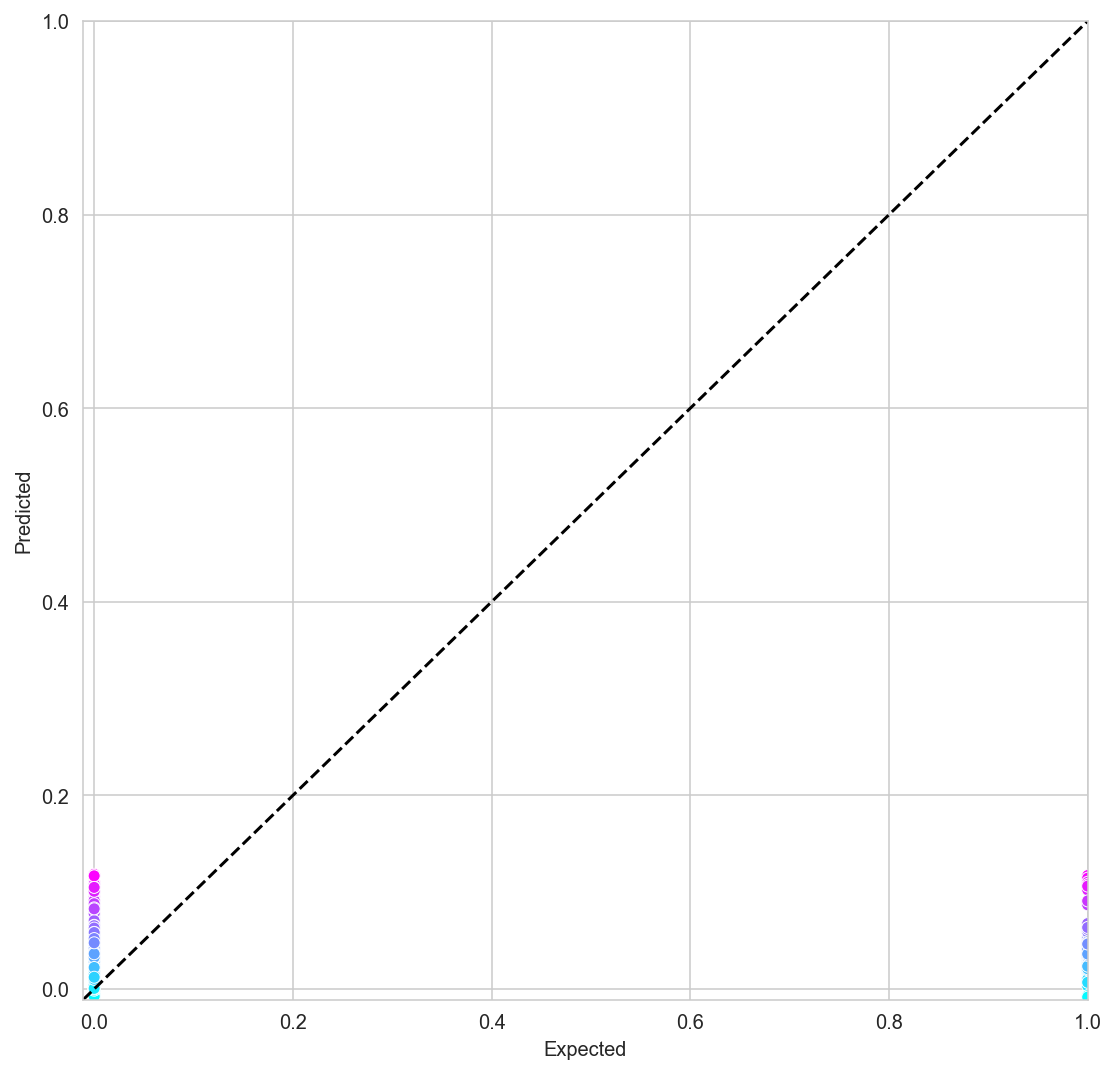

In [115]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--') 
#If every predicted value were to match the expected value, then all the dots would be plotted along the dashed line.

**Regression Model Metrics**

In [116]:
from sklearn import metrics

In [117]:
metrics.r2_score(expected, predicted)

0.024062610729206124

By using multiple linear regression model, we can know that the relationships between time_spend_company and salary show like direct proportion. By see the comparision of expected and predictive values, we can see that our prediction is not that bad. However, the accuracy of the model is not high. The biggest reason is the potential problem in original dataset. This is the future work we may need to deal with.

### Data preprocessing for predicting "left"

**k-Nearest Neighbor & Decision Tree:we want to use these two models to predict the feature 'left', so we cannot remove the feature 'left'. We want to use the data frame hr_df2 and redo the data preprocess for it. Remove "is_smoker" and keep "left"**

In [67]:
hr_df2 = hr_df2.reset_index(drop = True)

hr_df2_left = hr_df2.drop(columns=['is_smoker'])
hr_df2_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,sales,low


**Check whether there is null value in the dataset**

In [118]:
hr_df2_left.dropna(inplace = True)
hr_df2_left = hr_df2_left.reset_index(drop=True)
hr_df2_left.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [119]:
len(hr_df2_left)

14490

**Transform some features to factor variables because categorical data must be preprocessed into numerical data or excluded**

In [120]:
hr_df2_left_predictive = hr_df2_left.copy()
left_factors = {'no':0,'yes':1}
hr_df2_left_predictive.loc[:,'salary'] = hr_df2_left.loc[:,'salary'].map(salary_factors)
hr_df2_left_predictive.loc[:,'department'] = hr_df2_left.loc[:,'department'].map(department_factors)
hr_df2_left_predictive.loc[:,'left'] = hr_df2_left.loc[:,'left'].map(left_factors)
hr_df2_left_predictive.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,0,1,0,1,0
1,0.80,0.86,5,262.0,6.0,0,1,0,1,1
2,0.11,0.88,7,272.0,4.0,0,1,0,1,1
3,0.72,0.87,5,223.0,5.0,0,1,0,1,0
4,0.10,0.77,6,247.0,4.0,0,1,0,1,0


In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**seperate the training and testing dataset**

In [141]:
train, test = train_test_split(hr_df2_left_predictive, test_size = 0.30, random_state= 11)

In [142]:
train_X = train[['satisfaction_level',
                 'last_evaluation','average_montly_hours',
                'time_spend_company','salary']]
train_Y = train.left

test_x = test[['satisfaction_level',
                 'last_evaluation','average_montly_hours',
                'time_spend_company','salary']]
test_y = test.left

**get the accuracy**

In [149]:
model1 = DecisionTreeClassifier(random_state=0)
model1.fit(train_X, train_Y)

y_pred1 = model1.predict(test_x)

print("Accuracy Score:", accuracy_score(test_y, y_pred1))

Accuracy Score: 0.9746951920864965


**Show confusion matrix and classification_report**

In [150]:
print(confusion_matrix(test_y, y_pred1))
print(classification_report(test_y, y_pred1))

[[3236   77]
 [  33 1001]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3313
           1       0.93      0.97      0.95      1034

    accuracy                           0.97      4347
   macro avg       0.96      0.97      0.97      4347
weighted avg       0.98      0.97      0.97      4347



In [151]:
importance = model1.feature_importances_
importance

array([0.52720556, 0.19471002, 0.13071248, 0.14146532, 0.00590662])

**print out how much influence that each feature makes**

Feature: 0, Score: 0.52721
Feature: 1, Score: 0.19471
Feature: 2, Score: 0.13071
Feature: 3, Score: 0.14147
Feature: 4, Score: 0.00591


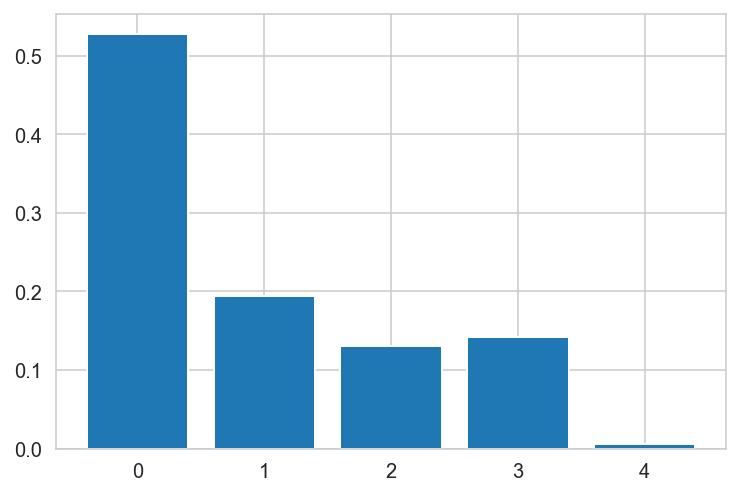

In [152]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
from matplotlib import pyplot
pyplot.bar([str(x) for x in range(len(importance))], importance)
pyplot.show()

We can know that satisfaction_level and last_evaluation cover more proportion for predicting left

**Using KNeighbors**

In [210]:
model2 = KNeighborsClassifier(n_neighbors=4)
model2.fit(train_X, train_Y)

y_pred2 = model2.predict(test_x)

print("Accuracy Score:", accuracy_score(test_y, y_pred2))

Accuracy Score: 0.9325971934667587


In [148]:
print(confusion_matrix(test_y, y_pred2))
print(classification_report(test_y, y_pred2))

[[3101  212]
 [  80  954]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3313
           1       0.82      0.92      0.87      1034

    accuracy                           0.93      4347
   macro avg       0.90      0.93      0.91      4347
weighted avg       0.94      0.93      0.93      4347



Finally,we can get the result that satisfaction_level and last_evaluation play really important role for predicting left. If the values of them are high, the employees tend to not to leave. 

**Heat Map for 'left'**

In [216]:
cor_left = hr_df2_left_predictive[['satisfaction_level',
                 'last_evaluation','average_montly_hours',
                'time_spend_company','salary','left']]

cor_left.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,salary,left
0,0.38,0.53,157.0,3.0,0,1
1,0.80,0.86,262.0,6.0,1,1
2,0.11,0.88,272.0,4.0,1,1
3,0.72,0.87,223.0,5.0,0,1
4,0.10,0.77,247.0,4.0,0,1


<AxesSubplot:>

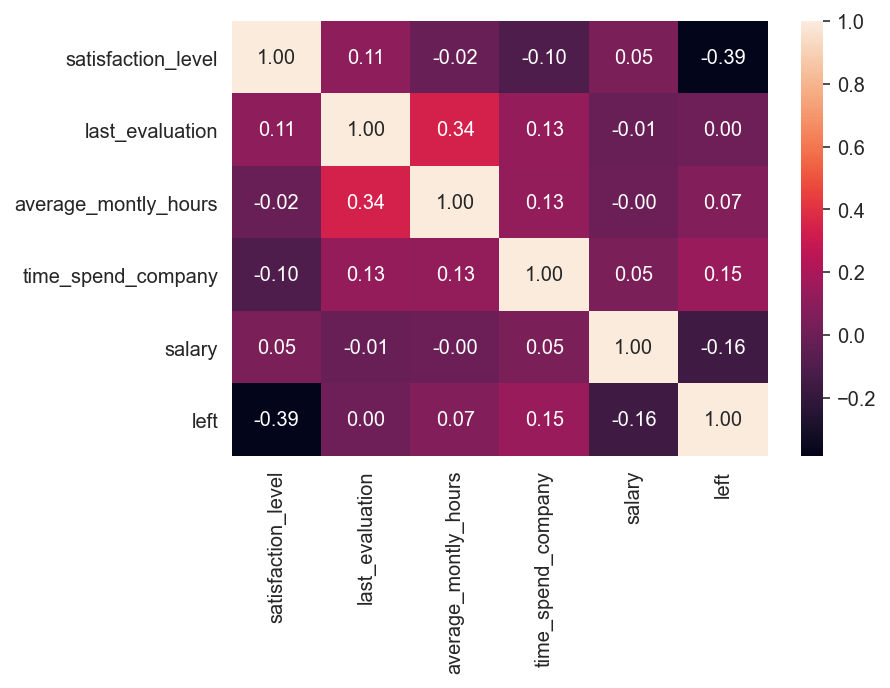

In [217]:
sns.heatmap(cor_left.corr(),annot = True,fmt=".2f")

From the graph, satisfaction_level,salary_level are more important features to predict the 'left' feature. Different relationships between each factor can also be seen. If satisfaction_level is higher, then the left will be lower.